# Medical Costs : How your profile affects your medical charges?


Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

### Columns

   - age: age of primary beneficiary

   - sex: female, male

   - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   - children: Number of children covered by health insurance / Number of dependents

   - smoker: Smoking

   - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   - charges: Individual medical costs billed by health insurance


In [1]:
# Import Libraries

import numpy as np #Numeric
import pandas as pd #Tabular
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
import os
from os.path import dirname, abspath, join #Operating System related operations
from sklearn.preprocessing import MinMaxScaler #Normalize based on Minimum and Maximum
from sklearn.model_selection import train_test_split ##Spliting
from sklearn import metrics #Metrics, Accuracy, Precision, Recall
from sklearn.metrics import mean_squared_error #For Regression (R Sq and Mean Sq)
%matplotlib inline 

## Load the data

In [2]:
proj_dir = dirname(abspath('.'))
data_dir = join(proj_dir, 'data')
os.path.abspath(os.path.dirname('.'))
insurance_file = join(data_dir,'insurance.csv')

In [3]:
ins = pd.read_csv(insurance_file)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1. Exploratory Data Analysis

In [5]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Univariate Analysis

In [7]:
def show_boxplot(col_data, x_label, y_label, title, fig_size=(7,7), show_outliers = True):
    """
    Shows Box Plots with mean
    
    Params:
    ----
    col_data = list or numpy array
    x_label, y_label, title = string
    ----
    fig_size = Tuple (int,int)
    show_outliers = bool
    """

    fig = plt.figure(figsize=fig_size, num=5)
    plt.boxplot(col_data, showmeans=True, showfliers=show_outliers)
    plt.title(title, fontsize=21, color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

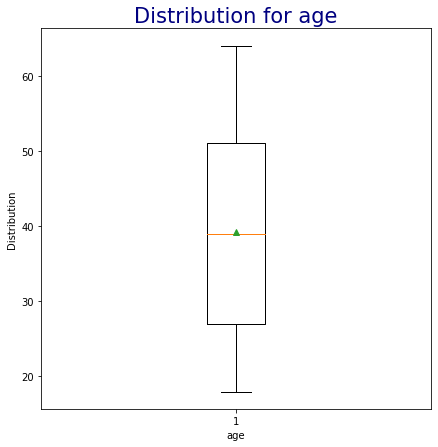

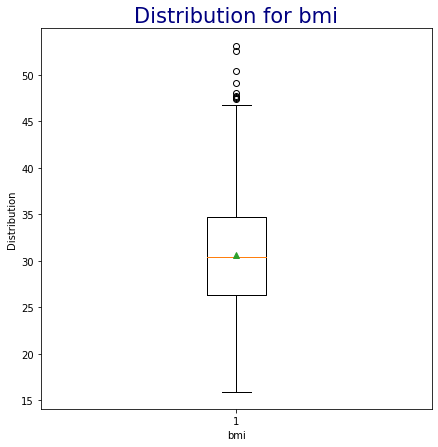

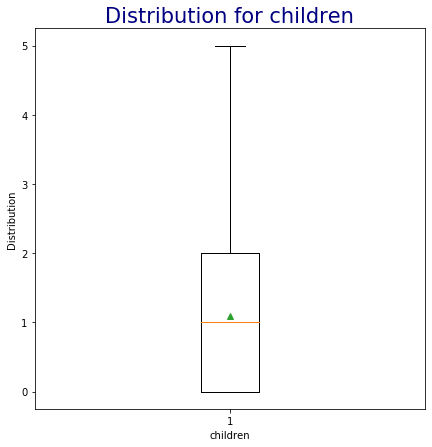

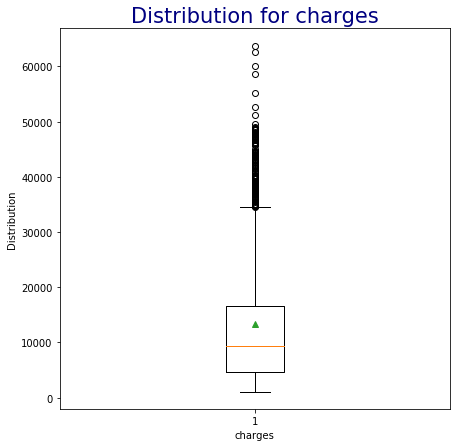

In [8]:
for col in ins.select_dtypes(include='number').columns:
    x_label = col
    y_label = 'Distribution'
    data = ins[col]
    title = f'Distribution for {col}'
    show_boxplot(col_data=data, x_label=x_label, y_label=y_label, title=title)

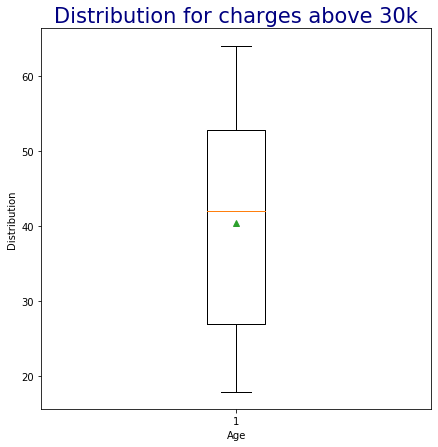

In [9]:
# Check Age Distribution for charges above 30K

temp = ins[ins['charges'] > 30000]
show_boxplot(temp['age'], x_label='Age', y_label='Distribution', title='Distribution for charges above 30k')

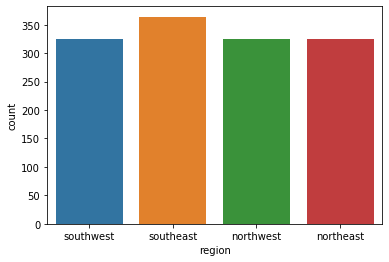

In [10]:
# Region wise patient count
sns.countplot(ins['region'])

## Bivariate Analysis

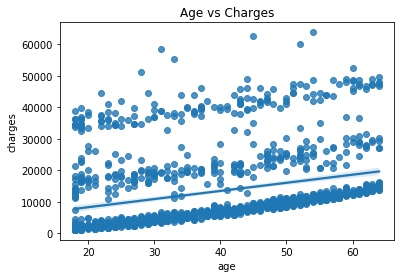

In [11]:
# Does charges increase with age

sns.regplot(x=ins['age'], y=ins['charges'])
plt.title('Age vs Charges')
plt.show()

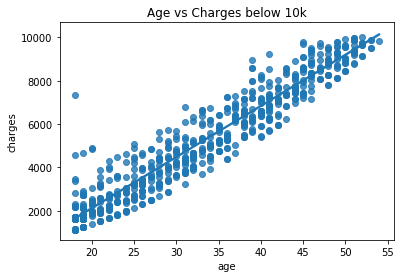

In [12]:
tmp2 = ins[ins['charges'] <= 10000]
tmp2['age'].corr(ins['charges'])
sns.regplot(x=tmp2['age'], y=tmp2['charges'])
plt.title('Age vs Charges below 10k')
plt.show()


#### 1.3 Charges Between Gender


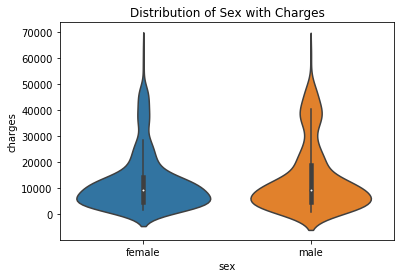

In [13]:
# is charge dependent on gender
sns.violinplot(x=ins['sex'], y=ins['charges'])
plt.title('Distribution of Sex with Charges')
plt.show()

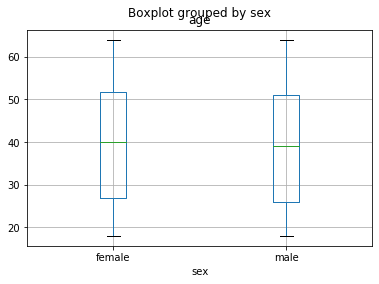

In [14]:
ins.boxplot(column='age', by='sex')
plt.show()

#### 1.4 Charges: Smokers and non-Smokers

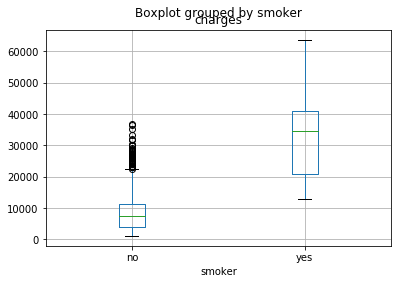

In [15]:
ins.boxplot(column='charges', by='smoker')
plt.show()

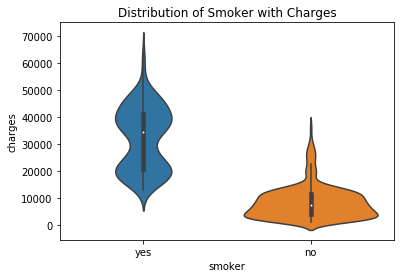

In [16]:
sns.violinplot(x=ins['smoker'], y=ins['charges'])
plt.title('Distribution of Smoker with Charges')
plt.show()

#### 1.3 Charges Between Regions

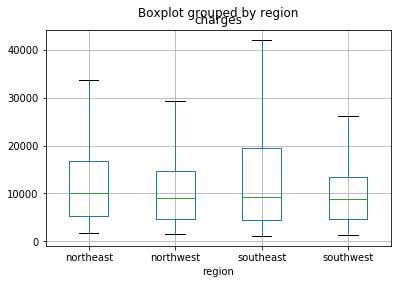

In [17]:
ins.boxplot(column='charges', by='region', showfliers=False)
plt.show()

#### 1.3 Charges between Smoker and Non-Smoker based on Region

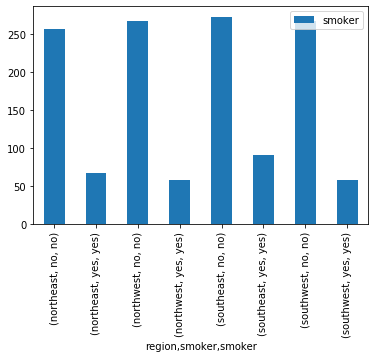

In [18]:
pd.DataFrame(ins.groupby(['region', 'smoker'])['smoker'].value_counts()).plot(kind='bar')
plt.show()

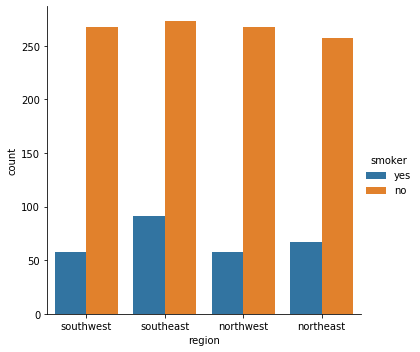

In [19]:
sns.catplot(x='region', hue='smoker', data=ins, kind='count')

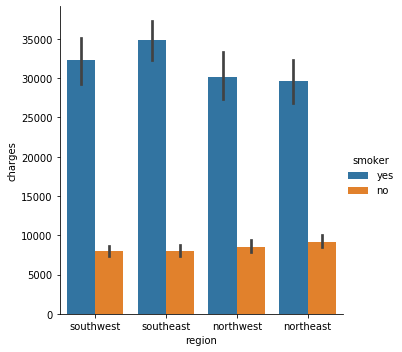

In [20]:
sns.catplot(x='region',y = 'charges', hue='smoker', data=ins, kind='bar')

#### 1.6 In Relation to Other Features

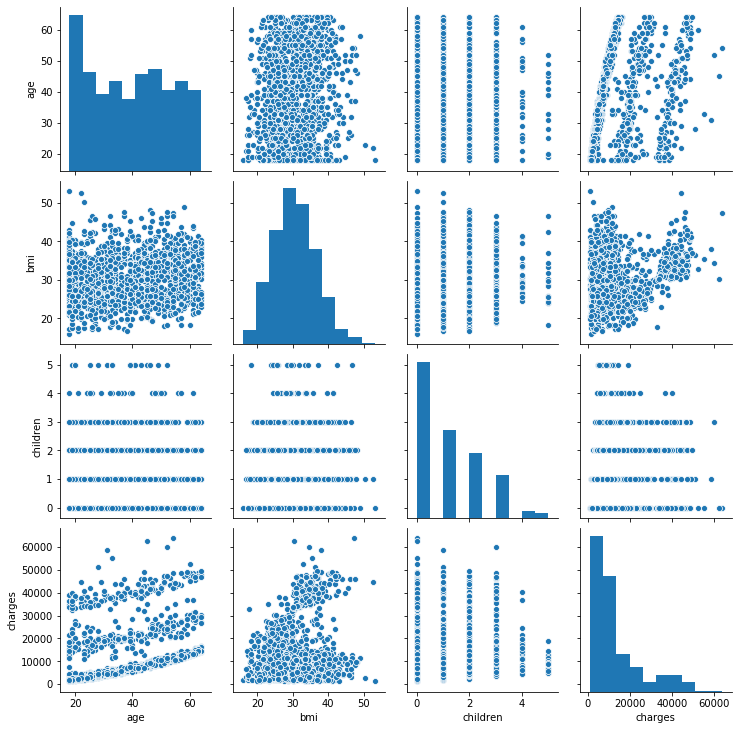

In [21]:
sns.pairplot(ins)

### 2. Pre-Processing the Data

In [22]:
## Min max scalar and transform everything into minimum and maximum
scaleMinMax = MinMaxScaler()

In [23]:
ins[['age','bmi', 'children']] = scaleMinMax.fit_transform(ins[['age', 'bmi', 'children']])

In [24]:
ins

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500


In [25]:
ins = pd.get_dummies(ins, columns=['smoker','sex','region'], drop_first=True)
ins

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1,0,0,0,1
1,0.000000,0.479150,0.2,1725.55230,0,1,0,1,0
2,0.217391,0.458434,0.6,4449.46200,0,1,0,1,0
3,0.326087,0.181464,0.0,21984.47061,0,1,1,0,0
4,0.304348,0.347592,0.0,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0,1,1,0,0
1334,0.000000,0.429379,0.0,2205.98080,0,0,0,0,0
1335,0.000000,0.562012,0.0,1629.83350,0,0,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,0,0,0,0,1


### 3. Quantifying the effect of the features to the medical charges

In [26]:
X = ins.drop('charges', axis=1)
y = ins['charges']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


### 4. Basic Machine Learning: Comparison Between Selected Regression Models


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [29]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [30]:
models = [
    ('Linear Regression', lr),
    ('Lasso', la),
    ('Ridge', ri),
    ('Random Forest', rf),
    ('Gradient Boosting', gb)
]

In [31]:
for m in models:
    name = m[0]
    model = m[1]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Results for {name}')
    print(round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

Results for Linear Regression
5956.45
Results for Lasso
5957.27
Results for Ridge
5964.71
Results for Random Forest
4749.12
Results for Gradient Boosting
4327.46
